# Packages

In [1]:
import os

import cartopy.crs as ccrs
import cartopy.io as cio
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import regionmask
import shapely.geometry as sg

In [2]:
%matplotlib inline

# Custom Indian Ocean region

Create a shapefile corresponding to the Indian Ocean between 20S - 20N, 40E - 120E, using
the [marine areas from NaturalEarth](https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-physical-labels/).

In [3]:
resolution = '10m'
category = 'physical'
name = 'geography_marine_polys'

# obtain NaturalEarth shapefile
shapefile = cio.shapereader.natural_earth(resolution=resolution, category=category, name=name)

In [4]:
# read regions from file
ne_marine_areas = gp.read_file(shapefile)

ne_marine_areas

,featurecla,name,namealt,changed,note,name_fr,min_label,max_label,scalerank,label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,ocean,Arctic Ocean,None,Version 1.4,None,ocÃ©an Arctique,1.0,6.5,0,ARCTIC OCEAN,...,Ocean Arktyczny,Oceano Ãrtico,Ð¡ÐµÐ²ÐµÑÐ½ÑÐ¹ ÐÐµÐ´Ð¾Ð²Ð¸ÑÑÐ¹ Ð¾ÐºÐµÐ°Ð½,Norra ishavet,Arktik Okyanusu,Báº¯c BÄng DÆ°Æ¡ng,åå°æ´,5,1159115017,"POLYGON ((179.52788 71.44019, 156.04239 77.470..."
1,ocean,SOUTHERN OCEAN,None,Version 1.4,None,ocÃ©an Austral,1.0,6.5,0,SOUTHERN OCEAN,...,Ocean PoÅudniowy,Oceano AntÃ¡rtico,Ð®Ð¶Ð½ÑÐ¹ Ð¾ÐºÐµÐ°Ð½,Antarktiska oceanen,GÃ¼ney Okyanusu,Nam Äáº¡i DÆ°Æ¡ng,åå°æ´,4,1159115037,"POLYGON ((-57.65469 -61.97275, -57.67637 -61.9..."
2,ocean,North Atlantic Ocean,None,Version 1.4,None,ocÃ©an Atlantique,1.0,6.5,0,NORTH ATLANTIC OCEAN,...,Ocean Atlantycki,Oceano AtlÃ¢ntico,ÐÑÐ»Ð°Ð½ÑÐ¸ÑÐµÑÐºÐ¸Ð¹ Ð¾ÐºÐµÐ°Ð½,Atlanten,Atlas Okyanusu,Äáº¡i TÃ¢y DÆ°Æ¡ng,å¤§è¥¿æ´,2,1159115057,"POLYGON ((-24.02137 64.87165, -24.02615 64.863..."
3,ocean,North Pacific Ocean,None,Version 1.4,None,ocÃ©an Pacifique,1.0,6.5,0,NORTH PACIFIC OCEAN,...,Ocean Spokojny,Oceano PacÃ­fico,Ð¢Ð¸Ñ Ð¸Ð¹ Ð¾ÐºÐµÐ°Ð½,Stilla havet,BÃ¼yÃ¼k Okyanus,ThÃ¡i BÃ¬nh DÆ°Æ¡ng,å¤ªå¹³æ´,2,1159115079,"MULTIPOLYGON (((179.99990 50.98684, 179.99990 ..."
4,ocean,South Pacific Ocean,None,Version 1.4,None,ocÃ©an Pacifique,1.0,6.5,0,SOUTH PACIFIC OCEAN,...,Ocean Spokojny,Oceano PacÃ­fico,Ð¢Ð¸Ñ Ð¸Ð¹ Ð¾ÐºÐµÐ°Ð½,Stilla havet,BÃ¼yÃ¼k Okyanus,ThÃ¡i BÃ¬nh DÆ°Æ¡ng,å¤ªå¹³æ´,2,1159115099,"MULTIPOLYGON (((179.99990 -60.53346, 166.06638..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,bay,Monterey Bay,None,Version 1.3,None,Baie de Monterey,7.6,10.0,7,Monterey Bay,...,Monterey Bay,BaÃ­a de Monterey,ÐÐ¾Ð½ÑÐµÑÐµÐ¹,None,None,None,èç¹é·ç£,4,1159120705,"POLYGON ((-121.91867 36.57248, -121.91934 36.5..."
303,river,Yangtze River,None,Version 1.3,None,Yangzi Jiang,5.7,10.0,4,None,...,Jangcy,Rio YangtzÃ©,Ð¯Ð½ÑÐ·Ñ,Yangtze,Yangtze,TrÆ°á»ng Giang,é¿æ±,2,1159120729,"POLYGON ((121.85496 31.70303, 121.87084 31.692..."
304,river,Columbia River,None,Version 1.3,None,Columbia,5.7,10.0,4,Columbia River,...,Kolumbia,Rio Columbia,ÐÐ¾Ð»ÑÐ¼Ð±Ð¸Ñ,Columbiafloden,Kolumbiya Nehri,SÃ´ng Columbia,å¥å«æ¯äºæ²³,4,1159120745,"MULTIPOLYGON (((-123.98882 46.21782, -123.9892..."
305,sea,Salish Sea,None,Version 2.1,None,mer des Salish,7.0,10.0,6,Salish Sea,...,None,None,ÐÐ¾ÑÐµ Ð¡ÐµÐ»Ð¸Ñ,None,None,None,None,4,1159120759,"POLYGON ((-124.71016 48.38017, -124.71597 48.3..."


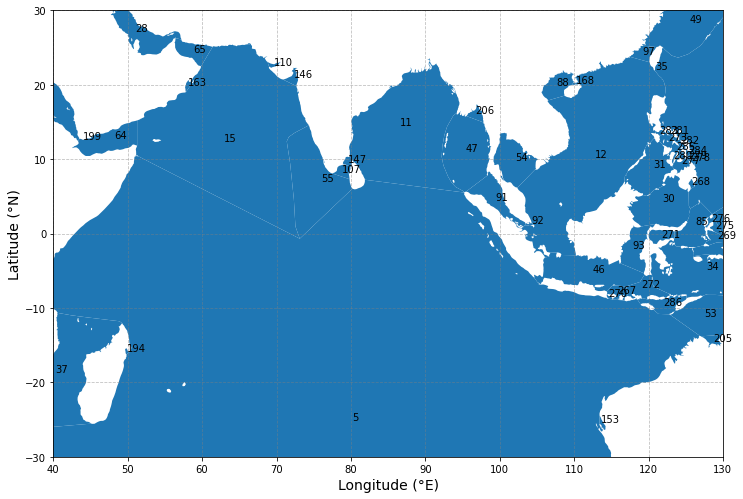

In [5]:
x_bounds = [40.0, 130.0]
y_bounds = [-30.0, 30.0]

fig = plt.figure(figsize=(12, 10))
ax = plt.gca()

ne_marine_areas.plot(ax=ax)

for idx, c in ne_marine_areas.iterrows():
    label = '{:d}'.format(idx)
    label_coords = c['geometry'].representative_point().coords[:][0]
    
    show_label = ((x_bounds[0] <= label_coords[0] <= x_bounds[1]) and
                  (y_bounds[0] <= label_coords[1] <= y_bounds[1]))
    if show_label:
        ax.annotate(label, xy=label_coords)

ax.set_xlim(*x_bounds)
ax.set_ylim(*y_bounds)

ax.grid(ls='--', color='gray', alpha=0.5)

ax.set_xlabel(u'Longitude (\N{DEGREE SIGN}E)', fontsize=14)
ax.set_ylabel(u'Latitude (\N{DEGREE SIGN}N)', fontsize=14)

plt.show()

plt.close()

In [6]:
# select a subset of the regions to use in the mask
regions_to_keep = [5, 194, 37, 199, 64, 28, 65, 163, 15, 110, 146, 55, 107, 147, 11, 47, 91]

ne_ind_ocean_regions = ne_marine_areas.iloc[regions_to_keep]

ne_ind_ocean_regions

,featurecla,name,namealt,changed,note,name_fr,min_label,max_label,scalerank,label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
5,ocean,INDIAN OCEAN,None,Version 1.4,None,ocÃ©an Indien,1.0,6.5,0,INDIAN OCEAN,...,Ocean Indyjski,Oceano Ãndico,ÐÐ½Ð´Ð¸Ð¹ÑÐºÐ¸Ð¹ Ð¾ÐºÐµÐ°Ð½,Indiska oceanen,Hint Okyanusu,áº¤n Äá» DÆ°Æ¡ng,å°åº¦æ´,4,1159115123,"POLYGON ((166.06638 -60.53346, 19.61584 -60.53..."
194,bay,Antongila Bay,None,Version 1.4,None,Baie d'Antongil,7.6,10.0,7,Antongila Bay,...,Zatoka Antongila,None,None,Helodranon' Antongila,None,None,å®éåç¾ç£,5,1159118761,"POLYGON ((50.19480 -15.95908, 49.82805 -16.249..."
37,channel,Mozambique Channel,None,Version 1.4,None,canal du Mozambique,4.0,8.5,2,Mozambique Channel,...,KanaÅ Mozambicki,Canal de MoÃ§ambique,ÐÐ¾Ð·Ð°Ð¼Ð±Ð¸ÐºÑÐºÐ¸Ð¹ Ð¿ÑÐ¾Ð»Ð¸Ð²,MoÃ§ambiquekanalen,Mozambik KanalÄ±,Eo biá»n Mozambique,è«æ¡æ¯å æµ·å³¡,4,1159115771,"POLYGON ((45.11211 -25.54123, 32.93280 -26.573..."
199,strait,Bab el Mandeb,None,Version 1.4,None,Bab-el-Mandeb,7.6,10.0,7,Bab el Mandeb,...,Bab al-Mandab,Bab-el-Mandeb,ÐÐ°Ð±-ÑÐ»Ñ-ÐÐ°Ð½Ð´ÐµÐ±ÑÐºÐ¸Ð¹ Ð¿ÑÐ¾Ð»Ð¸Ð²,Bab el-Mandeb,BabÃ¼'l Mendep,Bab-el-Mandeb,æ¼å¾·æµ·å³¡,5,1159118853,"MULTIPOLYGON (((43.92490 12.61955, 43.90527 12..."
64,gulf,Gulf of Aden,None,Version 1.4,None,golfe d'Aden,5.0,9.5,3,Gulf of Aden,...,Zatoka AdeÅska,Golfo de Ãden,ÐÐ´ÐµÐ½ÑÐºÐ¸Ð¹ Ð·Ð°Ð»Ð¸Ð²,Adenviken,Aden KÃ¶rfezi,Vá»nh Aden,äºä¸æ¹¾,4,1159116333,"POLYGON ((51.26104 15.20936, 51.26739 15.18714..."
28,gulf,Persian Gulf,Arabian Gulf,Version 1.4,None,Golfe Persique,2.0,7.5,1,Persian Gulf,...,Zatoka Perska,Golfo PÃ©rsico,ÐÐµÑÑÐ¸Ð´ÑÐºÐ¸Ð¹ Ð·Ð°Ð»Ð¸Ð²,Persiska viken,Basra KÃ¶rfezi,Vá»nh Ba TÆ°,æ³¢æ¯æ¹¾,4,1159115597,"POLYGON ((57.20357 26.10014, 57.16548 26.09908..."
65,gulf,Gulf of Oman,None,Version 1.4,None,Golfe d'Oman,5.0,9.5,3,Gulf of Oman,...,Zatoka OmaÅska,Golfo de OmÃ£,ÐÐ¼Ð°Ð½ÑÐºÐ¸Ð¹ Ð·Ð°Ð»Ð¸Ð²,Omanbukten,Umman KÃ¶rfezi,Vá»nh Oman,é¿æ¼ç£,4,1159116359,"POLYGON ((61.40569 25.10371, 61.40093 25.08255..."
163,gulf,Gulf of Masira,None,Version 1.4,None,Golfe de Masira,6.0,10.0,5,None,...,None,None,None,None,None,None,None,0,1159118175,"POLYGON ((58.64823 20.20786, 57.81108 19.02042..."
15,sea,Arabian Sea,None,Version 1.4,None,mer d'Arabie,2.0,7.5,1,Arabian Sea,...,Morze Arabskie,Mar ArÃ¡bico,ÐÑÐ°Ð²Ð¸Ð¹ÑÐºÐ¾Ðµ Ð¼Ð¾ÑÐµ,Arabiska havet,Umman Denizi,Biá»n áº¢ Ráº­p,é¿æä¼¯æµ·,4,1159115343,"POLYGON ((73.12301 -0.68047, 51.38806 10.40877..."
110,gulf,Gulf of Kutch,None,Version 1.4,None,Golfe de Kutch,5.7,10.0,4,Gulf of Kutch,...,Zatoka KaÄÄh,Golfo de Kutch,ÐÐ°ÑÑÐºÐ¸Ð¹ Ð·Ð°Ð»Ð¸Ð²,Gulf of Kachchh,KuÃ§ KÃ¶rfezi,Vá»nh Kutch,å å¥ç£,4,1159117185,"POLYGON ((69.01354 22.40814, 68.99076 22.43778..."


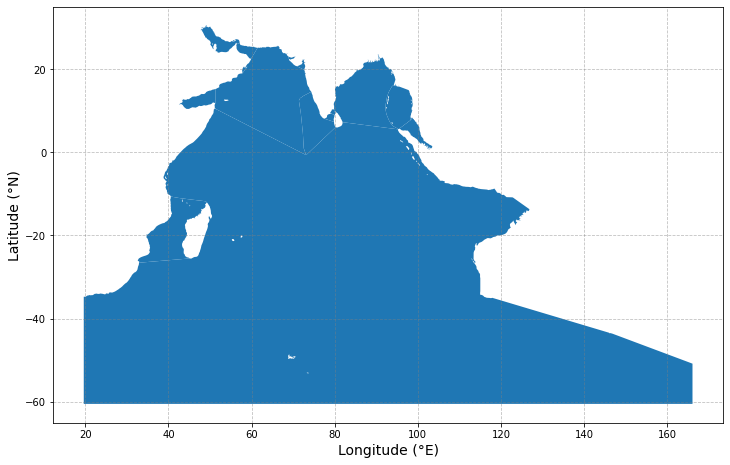

In [7]:
fig = plt.figure(figsize=(12, 10))
ax = plt.gca()

ne_ind_ocean_regions.plot(ax=ax)

ax.grid(ls='--', color='gray', alpha=0.5)

ax.set_xlabel(u'Longitude (\N{DEGREE SIGN}E)', fontsize=14)
ax.set_ylabel(u'Latitude (\N{DEGREE SIGN}N)', fontsize=14)

plt.show()

plt.close()

In [8]:
# define box restricting mask to tropical latitudes
box = np.array([[40.0, -20.0], [120.0, -20.0], [120.0, 20.0], [40.0, 20.0]])

box_polys = gp.GeoSeries([sg.Polygon(box)])

box_df = gp.GeoDataFrame({'geometry': box_polys})

In [9]:
# take set intersection to define mask
ne_trop_ind_ocean_region = gp.overlay(ne_ind_ocean_regions, box_df, how='intersection')

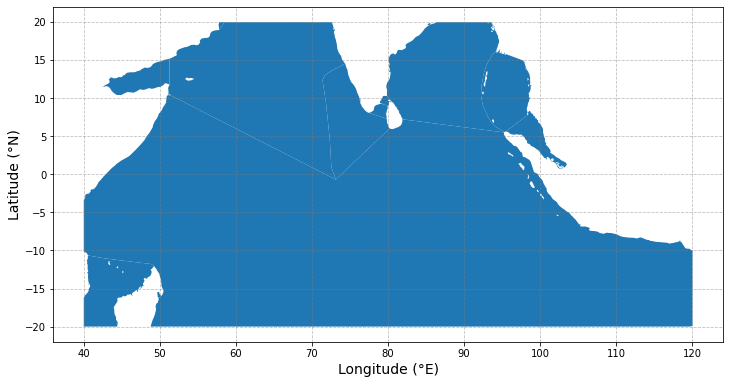

In [10]:
fig = plt.figure(figsize=(12, 10))
ax = plt.gca()

ne_trop_ind_ocean_region.plot(ax=ax)

ax.grid(ls='--', color='gray', alpha=0.5)

ax.set_xlabel(u'Longitude (\N{DEGREE SIGN}E)', fontsize=14)
ax.set_ylabel(u'Latitude (\N{DEGREE SIGN}N)', fontsize=14)

plt.show()

plt.close()

In [11]:
# write to shapefile
dest_dir = os.path.join(
    os.getenv('HOME'),
    'projects', 'python-examples', 'custom-regions', 'results')
    
if not os.path.isdir(dest_dir):
    os.makedirs(dest_dir)
    
output_file = os.path.join(dest_dir, f'ne_{resolution}_tropical_indian_ocean')

ne_trop_ind_ocean_region.to_file(output_file)

In [13]:
# test creating a mask using the shapefile output
mask_input = gp.read_file(output_file)

regions = regionmask.from_geopandas(mask_input)
regions

<regionmask.Regions>
Name:     unnamed

Regions:
 0  r0  Region0
 1  r1  Region1
 2  r2  Region2
 3  r3  Region3
 4  r4  Region4
..  ..      ...
 9  r9  Region9
10 r10 Region10
11 r11 Region11
12 r12 Region12
13 r13 Region13

[14 regions]

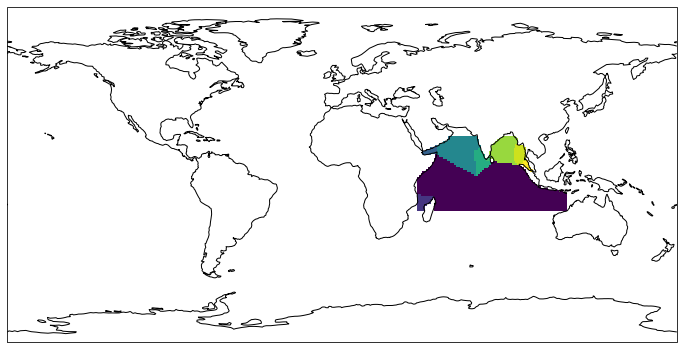

In [14]:
lon = np.arange(-180, 180)
lat = np.arange(-90, 90)

mask = regions.mask(lon, lat)

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

ax.set_global()
ax.coastlines()

plt.show()

plt.close()